# 6.3 Geographical visualizations with Python

## This script contains the following points:

1. Install the libraries folium and JSON via Anaconda

2. Create a new Jupyter notebook for conducting geospatial analysis

3. Import the libraries needed for the analysis

4. Find a JSON/GeoJSONfile containing location data that corresponds to the location data in the project data

5. Wrangle the project data to meet the needs of analysis

6. Clean the dataset

7. Create a choropleth map

8. Discuss the results

## 1. Install the libraries folium and JSON via Anaconda

## 2. Create a new Jupyter notebook for conducting geospatial analysis

## 3. Import the libraries needed for the analysis

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [7]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [8]:
# Import dataset

path = r'C:\Users\admin\08-2024 Open-Sourced Data Analysis'
df = pd.read_csv(os.path.join(path, 'Data', 'health_cleaned.csv'), encoding='unicode_escape', index_col = False)

In [9]:
df.head()

,location,year_start,year_end,cog_decline,assistance_cog_decline,subj_cog_decline_more,subj_cog_decline_report,mental_distress,lifetime_depression,2_more_fruits,3_more_fruits,non_physical,obesity,suficient_sleep,subj_bad_health,subj_good_health,high_blood_press_med,high_blood_press,drinking_30_days,smoking
0,Alabama,2015.0,2015.0,48.3,41.7,12.8,45.5,12.4,23.0,18.2,10.6,37.3,36.2,NaN,30.0,70.0,90.7,60.6,6.6,17.3
1,Alabama,2016.0,2016.0,NaN,NaN,NaN,NaN,12.8,22.6,NaN,NaN,36.3,36.0,65.4,30.6,69.4,NaN,NaN,7.6,18.0
2,Alabama,2017.0,2017.0,NaN,NaN,NaN,NaN,13.3,23.3,24.1,11.1,38.9,36.7,NaN,33.0,67.0,90.6,61.8,6.9,16.7
3,Alabama,2018.0,2018.0,NaN,NaN,NaN,NaN,14.0,24.0,NaN,NaN,36.6,37.3,65.0,31.2,68.8,NaN,NaN,6.8,16.4
4,Alabama,2019.0,2019.0,45.1,38.7,14.7,45.2,13.4,22.0,28.3,11.6,36.4,36.7,NaN,31.1,68.9,90.6,62.6,6.9,17.2


## 4. Find a JSON/GeoJSONfile containing location data that corresponds to the location data in the project data

My data is about US so I use the United States JSON file from the example exercise.

In [12]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\admin\08-2024 Open-Sourced Data Analysis\Data\us-states.json'

In [13]:
# look at the JSON file

f = open(r'C:\Users\admin\08-2024 Open-Sourced Data Analysis\Data\us-states.json')
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

## 5. Wrangle the project data to meet the needs of analysis

In [15]:
df.columns

Index(['location', 'year_start', 'year_end', 'cog_decline',
       'assistance_cog_decline', 'subj_cog_decline_more',
       'subj_cog_decline_report', 'mental_distress', 'lifetime_depression',
       '2_more_fruits', '3_more_fruits', 'non_physical', 'obesity',
       'suficient_sleep', 'subj_bad_health', 'subj_good_health',
       'high_blood_press_med', 'high_blood_press', 'drinking_30_days',
       'smoking'],
      dtype='object')

In [16]:
df.rename(columns = {'suficient_sleep' : 'sufficient_sleep'}, inplace = True)

In [17]:
# Create a subset for the choropleth map: a subset of the health data in the U.S. by state in 2022

df_sub = df[df["year_start"].isin([2022, 2022])]

In [18]:
df_sub.head()

,location,year_start,year_end,cog_decline,assistance_cog_decline,subj_cog_decline_more,subj_cog_decline_report,mental_distress,lifetime_depression,2_more_fruits,3_more_fruits,non_physical,obesity,sufficient_sleep,subj_bad_health,subj_good_health,high_blood_press_med,high_blood_press,drinking_30_days,smoking
8,Alabama,2022.0,2022.0,NaN,NaN,NaN,NaN,14.7,22.3,NaN,NaN,36.3,40.2,63.0,31.3,68.7,NaN,NaN,7.2,13.9
17,Alaska,2022.0,2022.0,NaN,NaN,NaN,NaN,9.3,16.1,NaN,NaN,27.7,32.7,68.9,20.7,79.3,NaN,NaN,11.8,14.6
26,Arizona,2022.0,2022.0,26.6,27.7,15.0,36.1,12.0,17.9,NaN,NaN,29.4,33.8,69.7,23.7,76.3,NaN,NaN,9.5,11.4
35,Arkansas,2022.0,2022.0,NaN,NaN,NaN,NaN,14.4,22.2,NaN,NaN,37.8,37.8,65.5,31.1,68.9,NaN,NaN,7.4,17.0
44,California,2022.0,2022.0,39.4,32.0,11.2,36.4,11.3,16.7,NaN,NaN,24.8,28.4,66.4,22.0,78.0,NaN,NaN,10.9,9.1


## 6. Clean the dataset

In [20]:
# Check for duplicates

dups = df_sub.duplicated()
dups.shape 

(59,)

No duplicates are found.

In [22]:
# Check for missing values

df_sub.isnull().sum()

location                    0
year_start                  0
year_end                    0
cog_decline                36
assistance_cog_decline     36
subj_cog_decline_more      36
subj_cog_decline_report    36
mental_distress             1
lifetime_depression         1
2_more_fruits              59
3_more_fruits              59
non_physical                0
obesity                     0
sufficient_sleep            0
subj_bad_health             0
subj_good_health            0
high_blood_press_med       59
high_blood_press           59
drinking_30_days            0
smoking                     1
dtype: int64

Several values are missing. However, deleting them would lose a significant prportion of the data so I will just leave the data like this. Also, more importantly, the variable I want to use for the choropleth map: 'subj_bad_health' has no missing values.

In [24]:
# Check for mixed types

for col in df_sub.columns.tolist():
    weird = (df_sub[[col]].map(type) != df_sub[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_sub[weird]) > 0:
        print(col)

No mixed types are found.

<Axes: xlabel='subj_good_health', ylabel='Count'>

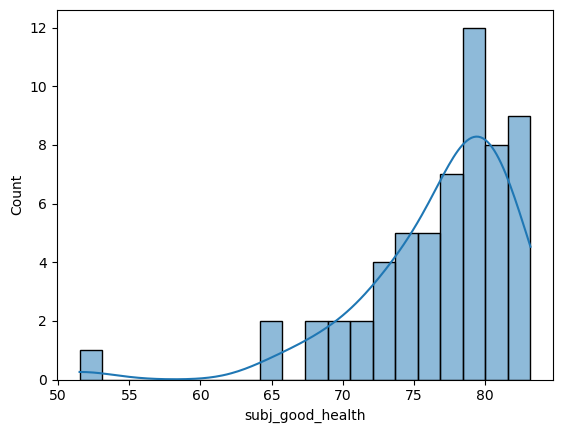

In [26]:
# Extreme value checks

sns.histplot(df_sub['subj_good_health'], bins=20, kde = True)

## 7. Create a choropleth map

In [28]:
# Create a data frame with just the states and the values for 'subj_good_health'

data_to_plot = df_sub[['location','subj_good_health']]
data_to_plot.head()

,location,subj_good_health
8,Alabama,68.7
17,Alaska,79.3
26,Arizona,76.3
35,Arkansas,68.9
44,California,78.0


In [29]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['location', 'subj_good_health'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "subj_good_health (unit: percentage)").add_to(map)
folium.LayerControl().add_to(map)

map

In [30]:
map.save('plot_data.html')

In [50]:
df_sub.to_csv(os.path.join(path, 'Data', 'health_cleaned_2022.csv'))

## 8. Discuss the results

The choropleth map didn't answer my questions but it does lead to and can answer a new research question: "Which states have the lowest percentage of elder adults who self-reported that their health is "good", "very good", or "excellent" in the lastest year of the dataset (2022)?" And the answer would be: In the year of 2022, the states "West Virginia" and "Mississippi" have the lowest percentage of elder adults with good self-reported data, following with "New Mexico", "Arkansas", "Louisiana", "Alabama", "Tennessee", and "Kentucky".